In [ ]:
!pip install wbdata

import plotly.offline as py
import pandas as pd
import wbdata
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import matplotlib.patches as mpatches
import cufflinks as cf
cf.go_offline()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Deliverable 1: Population Statistics

A python function named population
that will deliver information to
answer the queries of the following
form:

In [year] how many
[people/males/females] aged [low] to
[high] were living in [the
world/region/country]?



In [ ]:
def population(year, sex, age_range, place):
  #Rounds years down to closest multiple of 5 due to data source
  age_min = (age_range[0]//5) * 5
  age_max = (age_range[1]//5) * 5
  if age_max > 80:
    age_max = 80
  age_ranges = []
  for i in range(age_min,age_max,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
  if age_range[1] > 80:
    age_ranges.append("80UP")
  male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
  female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
  variables = male_variables
  if sex == "Female":
    variables = female_variables
  elif sex != "Male":
    variables.update(female_variables)
  df = wbdata.get_dataframe(variables,country=place)
  year_query = "date==\'" + str(year) + "\'"
  df = df.query(year_query).sum(axis=0)
  return df.sum(axis=0)

In [ ]:
assert population(year=2000,sex='Male',age_range=(0,100),place='WLD') < 7e9/2
assert population(year=2000,sex='Male',age_range=(0,100),place='WLD') > 7e9/2 - 5e8

In [ ]:
population(year=1966,sex='Male',age_range=(18,26),place='USA')

15129632.0

#Deliverable #2: Population DataFrames

A function that returns a pandas DataFrame
indexed by Region or Country and Year, with
columns giving counts of people in different
age-sex groups.

In [ ]:
def population_df(year, region):
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")

    male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range[:2]+'-'+age_range[-2:] for age_range in age_ranges}
    female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range[:2]+'-'+age_range[-2:] for age_range in age_ranges}
    variables = male_variables
    variables.update(female_variables)
        
    df = wbdata.get_dataframe(variables,country=region)
    #final_df = pd.DataFrame(df, columns=["Population Age Range", "Population Count"])
    return df.loc[[str(year)],:]


In [ ]:
population_df(2020, "NER")

,Males 00-04,Males 05-09,Males 10-14,Males 15-19,Males 20-24,Males 25-29,Males 30-34,Males 35-39,Males 40-44,Males 45-49,...,Females 35-39,Females 40-44,Females 45-49,Females 50-54,Females 55-59,Females 60-64,Females 65-69,Females 70-74,Females 75-79,Females 80-UP
date,,,,,,,,,,,,,,,,,,,,,
2020,2439254.0,1975614.0,1637522.0,1329481.0,1062051.0,831652.0,669944.0,565888.0,461871.0,367566.0,...,538111.0,437191.0,352971.0,295922.0,244131.0,190655.0,139784.0,96567.0,59090.0,31526.0


Construct data frames for population pyramid.

In [ ]:
age_ranges = []
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range[:2]+'-'+age_range[-2:] for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range[:2]+'-'+age_range[-2:] for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

df = wbdata.get_dataframe(variables,country="NER")
df

,Males 00-04,Males 05-09,Males 10-14,Males 15-19,Males 20-24,Males 25-29,Males 30-34,Males 35-39,Males 40-44,Males 45-49,...,Females 35-39,Females 40-44,Females 45-49,Females 50-54,Females 55-59,Females 60-64,Females 65-69,Females 70-74,Females 75-79,Females 80-UP
date,,,,,,,,,,,,,,,,,,,,,
2021,2526430.0,2047857.0,1701352.0,1385553.0,1108504.0,870586.0,693839.0,582036.0,480830.0,380463.0,...,554509.0,455404.0,364573.0,303450.0,251319.0,196869.0,144383.0,97219.0,61112.0,32610.0
2020,2439254.0,1975614.0,1637522.0,1329481.0,1062051.0,831652.0,669944.0,565888.0,461871.0,367566.0,...,538111.0,437191.0,352971.0,295922.0,244131.0,190655.0,139784.0,96567.0,59090.0,31526.0
2019,2352591.0,1907666.0,1574989.0,1275154.0,1016775.0,796282.0,649339.0,549180.0,443415.0,355764.0,...,521211.0,419770.0,342360.0,288428.0,236588.0,184171.0,134421.0,96040.0,56519.0,30167.0
2018,2268252.0,1841530.0,1514067.0,1222928.0,972266.0,763932.0,630543.0,531825.0,425738.0,344995.0,...,503813.0,403418.0,332553.0,280763.0,228701.0,177469.0,128661.0,95165.0,53609.0,28546.0
2017,2186576.0,1776917.0,1454704.0,1172806.0,928615.0,734349.0,612296.0,513445.0,409311.0,335316.0,...,485650.0,388550.0,323501.0,272877.0,220885.0,170987.0,124381.0,93039.0,50843.0,27020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,418642.0,308080.0,251785.0,185431.0,163604.0,127395.0,101823.0,82842.0,69054.0,55708.0,...,98733.0,82673.0,69129.0,55491.0,42009.0,29571.0,20833.0,9835.0,2370.0,830.0
1963,407779.0,299490.0,232361.0,188176.0,157611.0,123056.0,98690.0,81041.0,67353.0,54272.0,...,96373.0,80940.0,67355.0,53818.0,40197.0,29095.0,19970.0,8635.0,2157.0,813.0
1962,396926.0,291155.0,216852.0,187282.0,151657.0,119138.0,95700.0,79403.0,65615.0,52870.0,...,94227.0,79238.0,65538.0,52143.0,38391.0,28831.0,18899.0,7362.0,2096.0,793.0


#Deliverable Number 3: Population Pyramids

A python function that takes as
input a pandas DataFrame with
columns providing counts of people by
age-sex groups, and constructs a
“population pyramid” graph for
visualizing the data.

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

configure_plotly_browser_state()

def population_pyramids(df, year):
  age_ranges = []
  for i in range(0,80,5):
      age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
  age_ranges.append("80UP")

  layout = go.Layout(barmode='overlay',
                    yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                    xaxis=go.layout.XAxis(title='Number'))

  bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
                y = [int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Men',
                marker=dict(color='purple'),
                hoverinfo='skip'
                ),

          go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women',
                marker=dict(color='pink'),
                hoverinfo='skip',
                )
          ]
  py.iplot(dict(data=bins, layout=layout))

In [ ]:
configure_plotly_browser_state()
population_pyramids(population_df(2020, "USA"), 2020)

[#C] Animated Population Pyramids

In [ ]:

def animated_population_pyramid(dataframe):

    # Count down by increments of 20 years
    years = range(2018,1960,-10)
    
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    # This makes a list of graphs, year by year
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
            for year in years]
          
    bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
             for year in years]

    return py.iplot(dict(data=bins, layout=layout))
configure_plotly_browser_state()        
animated_population_pyramid(df)

[#C] Population Maps

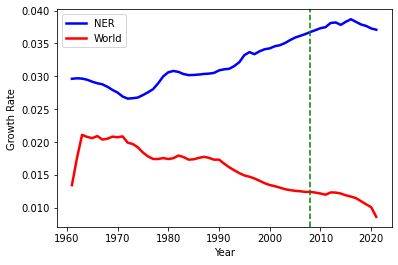

In [ ]:
variable_labels = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "NER":"Niger"
            }

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
new_df = np.log(df).diff()

# Useful arguments to pass include xTitle, yTitle, Title
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="date", y="Niger", 
             label = 'NER', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=new_df, x="date", y="World", 
             label = 'World', color='red', linewidth=2.5, ax = ax)
#The economic impact of the global financial crisis in 2008, which affected Niger's export revenues and led to a decline in economic growth.
plt.axvline(x = 2008, color = 'green', linestyle = '--')
ax.set(xlabel='Year', ylabel='Growth Rate');

#Deliverable #6: Agricultural Supply

Relate changes in agricultural food supply
to changes in population.

What would Malthus think?

In [ ]:

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)
configure_plotly_browser_state()

vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}

food = fix_date_index(wbdata.get_dataframe(vars,country="NER")).dropna()
# Add population back...
Population = food.Population

# Weight indices by population

# No "WLD" or other regions; add up all countries
food = food.groupby('date').sum().replace(0,np.nan).dropna()


food.sort_index(inplace=True)

# Normalize so 2000 = 1
food = food/food.loc[2000,:]

food.iplot(xTitle="Year",yTitle="Index")

[#C] Other Visualization Tools
#Comparing Rural and urban population growth rates in Niger and World

In [ ]:
def growth_df(region):
    df=wbdata.get_dataframe({'SP.POP.GROW': 'Total Population growth (annual %)',
                            'SP.RUR.TOTL.ZG': 'Rural population growth (annual %)',
                            'SP.URB.GROW': 'Urban population growth (annual %)'}, country=region)
    df.index = df.index.rename('year')
    df.index = df.index.astype(int)
    df = df.drop([2020])
    return df

ner_gr = growth_df('NER')
ner_gr.head()
wld_gr = growth_df('WLD')
wld_gr.head()

def urb_rur_plot(df, region_name, color):
    fig = plt.figure(figsize=(11.75, 8.25))
    ax = plt.axes() 
    
    plt.plot(df.index, df.iloc[:, 0],  color=color)
    plt.plot(df.index, df.iloc[:, 1],  '--', color=color)
    plt.plot(df.index, df.iloc[:, 2],  '.-', color=color, linewidth=1)
    
    plt.plot(wld_gr.index, wld_gr.iloc[:, 0],  color='lightgray')
    plt.plot(wld_gr.index, wld_gr.iloc[:, 1],  '--', color='lightgray')
    plt.plot(wld_gr.index, wld_gr.iloc[:, 2],  '.-', color='lightgray', linewidth=1);

    ax.legend((df.columns+", {}".format(region_name)).append(wld_gr.columns+", World"))

    plt.title('Comparing rural and urban population growth rates in Niger and World', {'fontsize': 15})
    plt.xlabel('year')
    plt.ylabel('Annual growth rate (%)')

    plt.show();


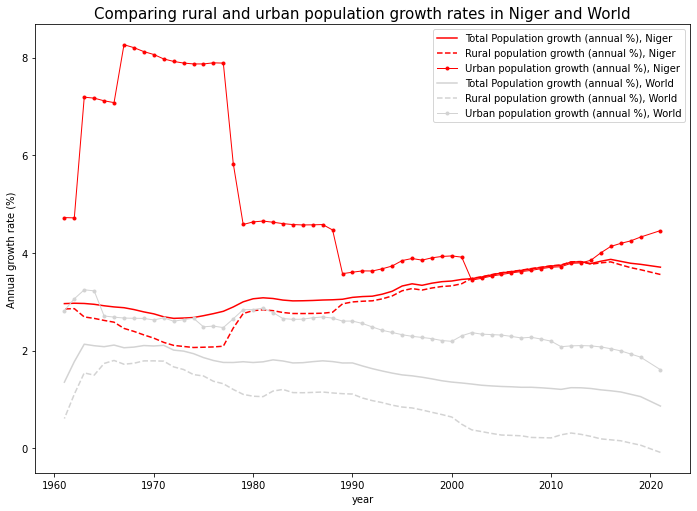

In [ ]:
urb_rur_plot(ner_gr, "Niger", 'red')

World vs Niger Female/Male Total Fertility Rates Graph

In [ ]:
# get variable names for NER tfr
variable_labels = {"SP.DYN.TFRT.IN":"Niger Total Fertility Rate"}

# get data frame for NER tfr
NER_FR = wbdata.get_dataframe(variable_labels, country="NER")
NER_FR = NER_FR.reset_index()
#change years to integer
NER_FR['date'] = NER_FR['date'].astype(int)

# get variable names for world tfr
variable_labels = {"SP.DYN.TFRT.IN":"World Total Fertility Rate"}
WLD_FR = wbdata.get_dataframe(variable_labels, country="WLD")
WLD_FR = WLD_FR.reset_index()
#change years to integer
WLD_FR['date'] = WLD_FR['date'].astype(int)

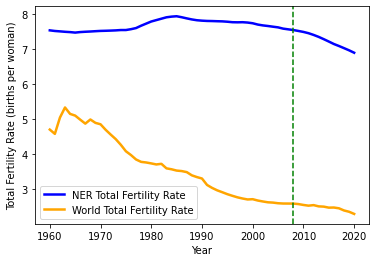

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(data=NER_FR, x="date", y="Niger Total Fertility Rate", 
             label = 'NER Total Fertility Rate', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=WLD_FR, x="date", y="World Total Fertility Rate", 
             label = 'World Total Fertility Rate', color='orange', linewidth=2.5, ax = ax)

plt.axvline(x = 2008, color = 'green', linestyle = '--')

plt.xticks(np.arange(min(NER_FR['date']), max(NER_FR['date'])+1, 10))
ax.set(xlabel='Year', ylabel='Total Fertility Rate (births per woman)');